### Libraries

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Preprocessing

Open file

In [2]:
def open_file(file_txt):
    
    with open(file_txt, 'r') as file:
        file_contents = file.read()

    return file_contents

In [3]:
file_M = 'Mariner.txt'
text_M = open_file(file_M)

file_T = 'Tempest.txt'
text_T = open_file(file_T)

Clear text and make it lower

In [4]:
def clean_text(text):

    cleaned_text = re.sub(r'[^\w\s]', ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    cleaned_text = cleaned_text.lower().split()

    return cleaned_text

In [5]:
clean_text_M = clean_text(text_M)
clean_text_T = clean_text(text_T)

# print(clean_text_M)
# print(clean_text_T)

### Enviromental Statistics

In this section we'll calculate:
 - $p(X)$
 - $p(Y)$
 - $p(Y|X)$

Convention: When the conditional probability $p(r|s)$ is represented using a matrix, this matrix will have shape $(dim_r, dim_s)$. <br>
In this way, we can calculate $p(r,s)=p(r∣s)⋅p(s)$ using matrix operations.

In [6]:
def unique_and_count(list_words):
    output = {}
    unique_words = list(set(list_words))

    output['Total'] = len(list_words)
    output['Unique'] = unique_words
    counts = {}
    counts_freq = {}

    for word in unique_words:
        counts[word] = list_words.count(word)
        counts_freq[word] = list_words.count(word)/len(list_words)

    output['Count'] = counts
    output['Count_freq'] = counts_freq

    return output   

In [7]:
dict_text_M = unique_and_count(clean_text_M)
# print('Total number of words in text M:', dict_text_M['Total'])
# print('Total number of unique words in text M:',len(dict_text_M['Unique']))
# print(dict_text_M['Count'])
# print(dict_text_M['Count_freq'], '\n')

dict_text_T = unique_and_count(clean_text_T)
# print('Total number of words in text T:', dict_text_M['Total'])
# print('Total number of unique words in text T:',len(dict_text_M['Unique']))
# print(dict_text_T['Count'])
# print(dict_text_T['Count_freq'])

In [8]:
complete_list_words = np.array(list(set(dict_text_M['Unique'] + dict_text_T['Unique'])))
# len(complete_list_words)
# complete_list_words_duplicate = dict_text_M['Unique'] + dict_text_T['Unique']
# print(len(dict_text_M['Unique']))
# print(len(dict_text_T['Unique']))
# print(len(complete_list_words))


In [9]:
Counts = np.zeros((len(complete_list_words), 3))

for i in range(len(complete_list_words)):

    word = complete_list_words[i]

    if word in dict_text_M['Count']:
        Counts[i, 0] = dict_text_M['Count'][str(word)]

    if word in dict_text_T['Count']:
        Counts[i, 1] = dict_text_T['Count'][str(word)]

Counts[:, 2] = Counts[:, 0] + Counts[:, 1]

data = {
    'Words': complete_list_words,
    'Mariner': Counts[:, 0],
    'Tempest': Counts[:, 1],
    'Total': Counts[:, 2]
    }

df = pd.DataFrame(data)
df

,Words,Mariner,Tempest,Total
0,trinculo,0.0,62.0,62.0
1,killed,2.0,1.0,3.0
2,chain,0.0,1.0,1.0
3,huge,1.0,1.0,2.0
4,glass,1.0,1.0,2.0
...,...,...,...,...
3560,lazy,0.0,2.0,2.0
3561,hogshead,0.0,1.0,1.0
3562,bawling,0.0,1.0,1.0
3563,refreshing,0.0,1.0,1.0


Convention:
- $0$ means Mariner 
- $1$ means Tempest

In [10]:
p_of_X = df['Total'] / np.sum(df['Total'])

p_of_M_given_X = df['Mariner'] / df['Total']
p_of_T_given_X = df['Tempest'] / df['Total']

df['P(X)'] = p_of_X
df['P(Y=0|X)'] = p_of_M_given_X
df['P(Y=1|X)'] = p_of_T_given_X

df


,Words,Mariner,Tempest,Total,P(X),P(Y=0|X),P(Y=1|X)
0,trinculo,0.0,62.0,62.0,0.002832,0.000000,1.000000
1,killed,2.0,1.0,3.0,0.000137,0.666667,0.333333
2,chain,0.0,1.0,1.0,0.000046,0.000000,1.000000
3,huge,1.0,1.0,2.0,0.000091,0.500000,0.500000
4,glass,1.0,1.0,2.0,0.000091,0.500000,0.500000
...,...,...,...,...,...,...,...
3560,lazy,0.0,2.0,2.0,0.000091,0.000000,1.000000
3561,hogshead,0.0,1.0,1.0,0.000046,0.000000,1.000000
3562,bawling,0.0,1.0,1.0,0.000046,0.000000,1.000000
3563,refreshing,0.0,1.0,1.0,0.000046,0.000000,1.000000


In [11]:
# p(y) = sum_over_x[ p(y|x)*p(x) ]

p_Y_given_X = np.zeros((2, (len(complete_list_words))))
p_Y_given_X[0, :] = df['P(Y=0|X)']
p_Y_given_X[1, :] = df['P(Y=1|X)']

p_of_Y = p_Y_given_X @ p_of_X
# print(p_of_Y)
# print(np.sum(p_of_Y))

### Codewords space

Calculation of:
- $p(x_{tilde}|x)$
- $p(x_{tilde}, x)$
- $p(x_{tilde})$

In [12]:
L = 64
l = np.arange(L)
l

# I want to calculate P(X_tilde|X)

p_Xtilde_given_X = np.random.random((L, len(df['Words'])))
Norm = np.sum(p_Xtilde_given_X, axis=0)
p_Xtilde_given_X = p_Xtilde_given_X / Norm

p_Xtilde_and_X = p_Xtilde_given_X * np.array(df['P(X)'])

p_Xtilde = np.sum(p_Xtilde_and_X, axis=1)

# print('p(x_tilde|x):', '\n', p_Xtilde_given_X, '\n')
# print('p(x_tilde, x):', '\n', p_Xtilde_and_X, '\n')
# print('p(x_tilde):', '\n', p_Xtilde, '\n')



Calculation of $p(x|x_{tilde})$

In [13]:
# p(X|X_tilda) = [p(X_tilda|X) * p(X)] / p(X_tilda) = p(X, X_tilda) / p(X_tilde)

p_X_given_Xtilde = p_Xtilde_and_X.T / p_Xtilde


Calculation of $p(y|x_{tilde})$

In [14]:
# calculate p(y|x_tilde) = sum_over_x [ p(y|x) * p(x|x_tilde)]

p_Y_given_Xtilde = p_Y_given_X @ p_X_given_Xtilde

Calculation of $D_{KL}(p(y|x)||p(y|x_{tilde}))$

In [15]:
#KL divergence D_KL( p(y|x) || p(y|x_tilde)) used as distortion function d(x, x_tilde)

def Distance_KL(P_Y_given_X, P_Y_given_Xtilde):

    d_KL = np.zeros((len(complete_list_words), L))

    epsilon = 1e-20

    for x in range(d_KL.shape[0]):
        for x_tilde in range(d_KL.shape[1]):

            log_arg = ( P_Y_given_X[:, x] ) / ( P_Y_given_Xtilde[:, x_tilde]+epsilon ) + epsilon

            d_KL[x, x_tilde] = np.sum(P_Y_given_X[:, x] * np.log(log_arg))

    return d_KL

D_KL = Distance_KL(p_Y_given_X, p_Y_given_Xtilde)


In [16]:
def Shannon_entropy(prob):

    epsilon = 1e-20
    
    info = np.log2(prob + epsilon)
    H = -np.sum(prob*info)

    return H

### Information bottleneck iterative algorithm 

![Descrizione dell'immagine](Algoritmo.png)


In [17]:
# approximation to print the output
app = 7

# Calculate the mutual information I(X: Xtile)
H_X = Shannon_entropy(p_of_X)
H_Xtilde = Shannon_entropy(p_Xtilde)
H_X_Xtilde = Shannon_entropy(p_Xtilde_and_X)
I_X_Xtilde = H_X + H_Xtilde - H_X_Xtilde

# Calculate the mutual information I(Y: Xtile)
H_Y = Shannon_entropy(p_of_Y)
p_Y_and_Xtilde = p_Y_given_Xtilde * p_Xtilde
H_Y_Xtilde = Shannon_entropy(p_Y_and_Xtilde)
I_Y_Xtilde = H_Y + H_Xtilde - H_Y_Xtilde

# hyperparameters
time_steps = 16
beta = 8


# check behaviour
I_X_Xtilde_list = [I_X_Xtilde]
I_Y_Xtilde_list = [I_Y_Xtilde]


# at time step = 0
print('-----  Step ' + str(0) + '  -----')

# print('p_Xtilde_given_X:', '\n', np.round(p_Xtilde_given_X, app), '\n')
# print('p_Xtilde:', '\n', np.round(p_Xtilde, app), '\n')
# print('p_Xtilde_and_X:', '\n', np.round(p_Xtilde_and_X, app), '\n')
# print('p_Y_given_Xtilde:', '\n', np.round(p_Y_given_Xtilde, app), '\n')

print('I(X, X_tilde):', np.round(I_X_Xtilde, app), '\n')
print('I(Y, X_tilde):', np.round(I_Y_Xtilde, app), '\n')


# next time steps

for t in np.arange(1, time_steps):

    # first equation
    p_Xtilde_matrix = np.tile(p_Xtilde, (len(df['Words']), 1)).T
    p_Xtilde_given_X = p_Xtilde_matrix * np.exp(-beta * Distance_KL(p_Y_given_X, p_Y_given_Xtilde).T)
    Z = np.sum(p_Xtilde_given_X, axis=0)
    p_Xtilde_given_X = p_Xtilde_given_X / np.array(Z)

    # second equation
    p_Xtilde = p_Xtilde_given_X @ p_of_X

    # third equation
    p_Xtilde_and_X = p_Xtilde_given_X * np.array(df['P(X)'])
    p_X_given_Xtilde = p_Xtilde_and_X.T / p_Xtilde
    p_Y_given_Xtilde = p_Y_given_X @ p_X_given_Xtilde

    # check mutual information I(X: Xtile)
    H_X = Shannon_entropy(p_of_X)
    H_Xtilde = Shannon_entropy(p_Xtilde)
    H_X_Xtilde = Shannon_entropy(p_Xtilde_and_X)
    I_X_Xtilde = H_X + H_Xtilde - H_X_Xtilde

    # check mutual information I(Y: Xtile)
    H_Y = Shannon_entropy(p_of_Y)
    p_Y_and_Xtilde = p_Y_given_Xtilde * p_Xtilde
    H_Y_Xtilde = Shannon_entropy(p_Y_and_Xtilde)
    I_Y_Xtilde = H_Y + H_Xtilde - H_Y_Xtilde

    # update list
    I_X_Xtilde_list.append(I_X_Xtilde)
    I_Y_Xtilde_list.append(I_Y_Xtilde)
    

    print('-----  Step ' + str(t) + '  -----')

    if t==time_steps-1:
        # print informations
                
        # print('p_Xtilde_given_X:', '\n', np.round(p_Xtilde_given_X, app), '\n')
        # print('p_Xtilde:', '\n', np.round(p_Xtilde, app), '\n')
        # print('p_Xtilde_and_X:', '\n', np.round(p_Xtilde_and_X, app), '\n')
        # print('p_Y_given_Xtilde:', '\n', np.round(p_Y_given_Xtilde, app), '\n')

        print('I(X, X_tilde):', np.round(I_X_Xtilde, app), '\n')
        print('I(Y, X_tilde):', np.round(I_Y_Xtilde, app), '\n')


-----  Step 0  -----
I(X, X_tilde): 0.2751104 

I(Y, X_tilde): 0.0001089 

-----  Step 1  -----
-----  Step 2  -----
-----  Step 3  -----
-----  Step 4  -----
-----  Step 5  -----
-----  Step 6  -----
-----  Step 7  -----
-----  Step 8  -----
-----  Step 9  -----
-----  Step 10  -----
-----  Step 11  -----
-----  Step 12  -----
-----  Step 13  -----
-----  Step 14  -----
-----  Step 15  -----
I(X, X_tilde): 0.5386256 

I(Y, X_tilde): 0.1454879 



In [18]:
# Calculate the mutual information I(Y: X)

p_Y_and_X = p_Y_given_X * np.array(p_of_X)
H_Y_X = Shannon_entropy(p_Y_and_X)
I_Y_X = H_Y + H_X - H_Y_X

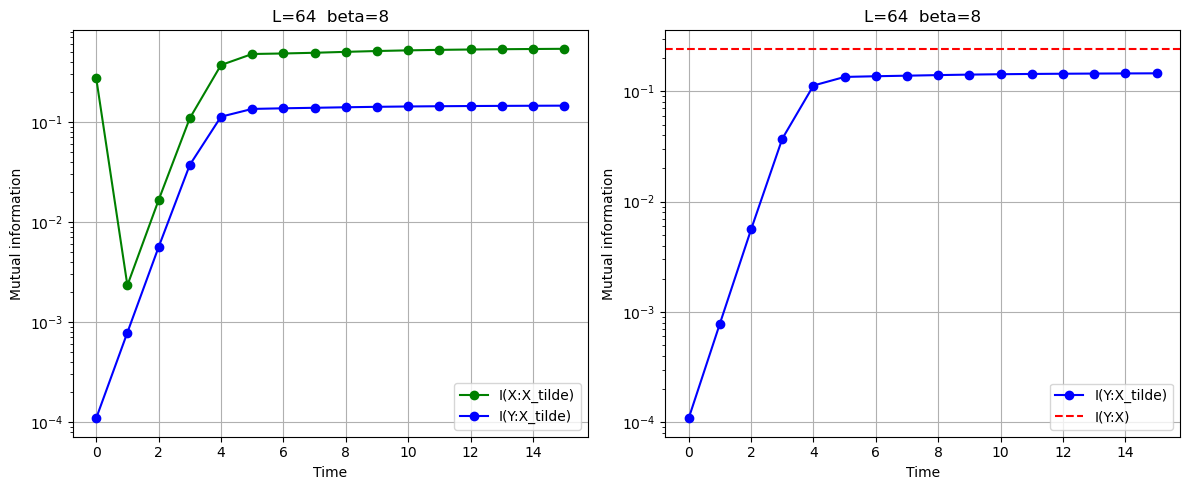

In [19]:

x = np.arange(time_steps)
title = 'L=' + str(L) + '  beta=' + str(beta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graph 1
ax1.plot(x, I_X_Xtilde_list, marker='o', linestyle='-', color='g', label='I(X:X_tilde)')
ax1.plot(x, I_Y_Xtilde_list, marker='o', linestyle='-', color='b', label='I(Y:X_tilde)')

ax1.set_yscale('log')
ax1.set_xlabel('Time')
ax1.set_ylabel('Mutual information')
ax1.set_title(title)
ax1.legend()
ax1.grid(True)

# Graph 2
ax2.plot(x, I_Y_Xtilde_list, marker='o', linestyle='-', color='b', label='I(Y:X_tilde)')
ax2.axhline(y=I_Y_X, color='r', linestyle='--', label='I(Y:X)')

ax2.set_yscale('log')
ax2.set_xlabel('Time')
ax2.set_ylabel('Mutual information')
ax2.set_title(title)
ax2.legend()
ax2.grid(True)

plt.tight_layout()

plt.show()